In [283]:
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import json  
import mpl_toolkits
import os
import pickle
import glob
import re
import itertools
from PIL import Image
import time


from skimage import color
from skimage.feature import hog

from skimage.transform import pyramid_gaussian
from skimage.io import imread
from skimage.feature import hog

import cv2
import argparse as ap


import sklearn as sklearn
from sklearn.metrics import confusion_matrix
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc


import pyimagesearch.imutils as imutils
from pyimagesearch.helpers import pyramid
from pyimagesearch.helpers import sliding_window

## Bring in images

In [284]:
os.listdir("shipsnet_data/shipsnet");
path =r'/Users/mayamidzik/cv/shipsnet/shipsnet_data/shipsnet'
boats = glob.glob(os.path.join(path,'1*.png'))
no_boats = glob.glob(os.path.join(path,'0*.png'))
boats.extend(no_boats)

In [285]:
image_data = []
image_tag = []

def makeImageDataTagArray(files_list):
    positive = re.compile("/Users/mayamidzik/cv/shipsnet/shipsnet_data/shipsnet/1.*")
    negative = re.compile("/Users/mayamidzik/cv/shipsnet/shipsnet_data/shipsnet/0.*")
    for i in files_list:
        if positive.match(i):
            image_tag.append(1)
        if negative.match(i):
            image_tag.append(0)
        img = Image.open(i)
        arr = np.array(img)
        image_data.append(arr)
        
makeImageDataTagArray(boats)

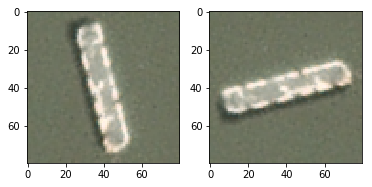

In [286]:
plt.subplot(1,2,1)
plt.imshow(image_data[200])
plt.subplot(1,2,2)
plt.imshow(np.rot90(image_data[200]));

## normalize images

In [287]:
def normalize(img_array):
    image_mean = np.mean(img_array)
    normalized_image = img_array / image_mean
    return normalized_image

In [288]:
norm_images = []
for image_array in image_data:
    norm = normalize(image_array)
    norm_images.append(norm)

In [289]:
norm_images_array = np.asarray(norm_images)

## Run SVM with normalized images

In [290]:
def make_vector(image_list):
    vectors = []
    for image in image_list:
        vector = np.ravel(image)
        vectors.append(vector)
    return np.array(vectors)

In [291]:
x_vect = make_vector(image_data)
x_norm_vect = make_vector(norm_images_array)
y_vect = np.ravel(image_tag)


In [292]:
xtrain, xtest, ytrain, ytest = train_test_split(x_vect, y_vect, test_size=0.2, random_state = 1234, stratify = y_vect, shuffle = True)
xnormtrain, xnormtest, ytrain, ytest = train_test_split(x_norm_vect, y_vect, test_size=0.2, random_state = 1234, stratify = y_vect, shuffle = True)



In [293]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def test_model(model, xtrain, ytrain, xtest, ytest):
    
    start_time = time.time()
    clf = model.fit(xtrain, ytrain)
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))

    y_true = ytest
    y_pred = clf.predict(xtest)

    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    print ("Specificity:              %0.2f" %(conf[1, 1] / (conf[1, 1] + conf[1, 0])))


    cm=confusion_matrix(y_true, y_pred, labels=None)

    plt.figure()
    plot_confusion_matrix(cm)
    return model

    print("--- %s seconds ---" % (time.time() - start_time))
    


In [311]:
xtest

array([[ 79,  79,  69, ...,  53,  58,  47],
       [ 68,  70,  58, ...,  67,  67,  57],
       [189, 160, 136, ..., 160, 143, 125],
       ...,
       [ 84,  93,  80, ...,  72,  87,  73],
       [229, 219, 206, ..., 200, 192, 177],
       [ 60,  76,  64, ...,  62,  76,  63]], dtype=uint8)

Training Data Accuracy: 1.00
Test Data Accuracy:     0.94
[[400  20]
 [ 11 129]]


Precision:              0.97
Recall:                 0.95
Specificity:              0.92
--- 207.83714413642883 seconds ---


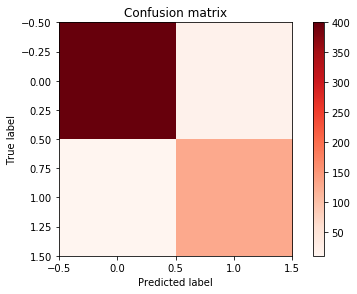

In [294]:
#SVC
svc = SVC(kernel = 'poly',degree = 3, probability=True)
start_time = time.time()
clf = svc.fit(xtrain, ytrain)
train_acc=clf.score(xtrain, ytrain)
test_acc=clf.score(xtest,ytest)
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

y_true = ytest
y_pred = clf.predict(xtest)

conf = confusion_matrix(y_true, y_pred)

print(conf)

print ('\n')
print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
print ("Specificity:              %0.2f" %(conf[1, 1] / (conf[1, 1] + conf[1, 0])))


cm=confusion_matrix(y_true, y_pred, labels=None)

plt.figure()
plot_confusion_matrix(cm)

print("--- %s seconds ---" % (time.time() - start_time))

In [319]:
print(clf.predict(np.asarray(xtest[1:10])))
print(ytest[1:10])

[1 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 1]


In [324]:
obs = np.asarray(xtest[1])
len(obs)
clf.predict(obs.reshape(1, -1))[0]

1

Text(0,0.5,'TPR')

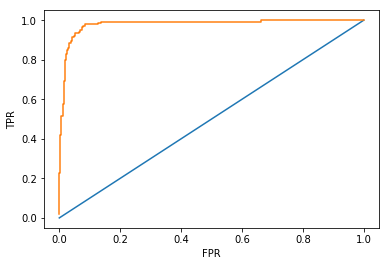

In [295]:
y_score=clf.predict_proba(xtest)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

## Tune SVM model

In [273]:
#define hyperparameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gammas,
                     'C': Cs},
                   {'kernel': ['poly'], 'degree':[2,3,4], 'gamma': gammas,
                     'C': Cs}]

In [ ]:
# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

#     clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
#                        scoring='%s_macro' % score)
#     clf.fit(xtrain, ytrain)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     with open('gridResults.pkl', 'wb') as picklefile:
#         pickle.dump(clf, picklefile)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = ytest, clf.predict(xtest)
#     print(classification_report(y_true, y_pred))
#     print()

# Test sliding window

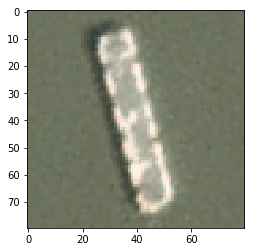

In [298]:
plt.imshow(image_data[200])

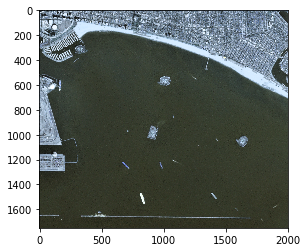

In [299]:
scene = cv2.imread('shipsnet_data/scenes/lb_1.jpg')
plt.imshow(scene)

In [326]:
(winW, winH) = (80, 80)

windows = []
i = 0
for (x, y, window) in sliding_window(scene, stepSize=20, windowSize=(winW, winH)):
    if window.shape[0] != winH or window.shape[1] != winW:
        continue
    print(i)
    x_image =np.ravel(window)
    y_pred = clf.predict(x_image.reshape(1, -1))[0]
    if y_pred ==1:
        windows.append(window)
    i+=

[[[106 125 146]
  [114 131 155]
  [ 85  97 112]
  ...
  [172 192 214]
  [167 187 209]
  [167 189 210]]

 [[ 99 115 135]
  [109 127 151]
  [ 66  75  85]
  ...
  [154 172 191]
  [153 174 194]
  [155 178 199]]

 [[ 67  80  91]
  [ 83 100 118]
  [ 53  61  69]
  ...
  [147 165 184]
  [146 168 188]
  [146 169 189]]

 ...

 [[123 139 158]
  [128 144 161]
  [127 145 164]
  ...
  [ 24  27  26]
  [ 25  28  29]
  [ 24  28  29]]

 [[121 135 152]
  [132 146 166]
  [119 135 153]
  ...
  [ 24  27  26]
  [ 28  31  31]
  [ 20  21  21]]

 [[123 138 156]
  [128 142 162]
  [109 125 141]
  ...
  [ 29  33  32]
  [ 29  33  33]
  [ 27  30  32]]]
[[[178 191 205]
  [157 170 183]
  [148 160 177]
  ...
  [ 18  21  23]
  [ 27  27  29]
  [ 40  42  45]]

 [[172 183 195]
  [151 164 175]
  [145 160 178]
  ...
  [ 28  31  34]
  [ 25  26  26]
  [ 25  29  31]]

 [[136 144 148]
  [139 146 155]
  [121 131 142]
  ...
  [ 16  19  20]
  [ 27  29  30]
  [ 24  35  39]]

 ...

 [[ 59  70  85]
  [ 79  94 113]
  [ 96 113 139]
  ..

[[[173 196 214]
  [185 206 226]
  [185 205 225]
  ...
  [176 195 213]
  [173 192 211]
  [169 188 208]]

 [[193 216 236]
  [203 226 248]
  [200 222 241]
  ...
  [175 192 211]
  [170 188 206]
  [173 191 210]]

 [[210 228 248]
  [213 231 251]
  [213 230 250]
  ...
  [152 170 186]
  [156 174 190]
  [174 190 211]]

 ...

 [[111 126 144]
  [101 116 133]
  [ 90 104 118]
  ...
  [168 188 208]
  [177 196 218]
  [179 196 219]]

 [[123 138 157]
  [108 124 140]
  [ 89 104 116]
  ...
  [165 185 204]
  [176 194 216]
  [183 200 223]]

 [[137 157 178]
  [116 133 150]
  [ 92 106 117]
  ...
  [165 185 204]
  [177 195 216]
  [185 202 223]]]
[[[154 171 189]
  [160 177 197]
  [162 179 199]
  ...
  [131 150 171]
  [127 143 161]
  [111 128 145]]

 [[149 165 182]
  [154 171 188]
  [157 175 194]
  ...
  [123 141 160]
  [119 136 153]
  [111 127 146]]

 [[147 162 177]
  [159 176 194]
  [158 178 197]
  ...
  [130 146 167]
  [120 137 156]
  [ 94 114 128]]

 ...

 [[208 230 250]
  [209 228 247]
  [199 219 238]
  ..

[[[145 158 175]
  [123 134 147]
  [137 145 161]
  ...
  [154 174 199]
  [154 179 207]
  [120 143 163]]

 [[141 152 167]
  [128 138 152]
  [139 149 167]
  ...
  [158 175 200]
  [153 172 197]
  [133 154 174]]

 [[141 151 165]
  [133 142 156]
  [132 143 159]
  ...
  [162 178 203]
  [162 180 207]
  [155 175 198]]

 ...

 [[167 180 196]
  [159 172 190]
  [135 151 168]
  ...
  [135 153 167]
  [132 143 152]
  [142 157 169]]

 [[136 153 167]
  [129 145 160]
  [116 131 147]
  ...
  [155 168 180]
  [166 176 186]
  [179 190 203]]

 [[105 123 132]
  [115 133 148]
  [106 125 140]
  ...
  [149 162 174]
  [147 161 171]
  [175 187 200]]]
[[[ 89 103 117]
  [ 95 110 124]
  [ 98 116 130]
  ...
  [176 192 208]
  [219 236 254]
  [228 240 255]]

 [[ 80  94 105]
  [ 94 111 124]
  [112 132 149]
  ...
  [184 205 220]
  [227 242 255]
  [232 242 255]]

 [[ 91 105 116]
  [109 131 147]
  [130 155 175]
  ...
  [205 223 240]
  [232 245 255]
  [235 243 255]]

 ...

 [[102 115 131]
  [ 91 102 112]
  [ 80  89  98]
  ..

[[[ 82  98 113]
  [ 67  80  87]
  [ 71  82  89]
  ...
  [ 87 103 115]
  [ 84 100 111]
  [ 86 104 117]]

 [[ 84 104 118]
  [ 77  95 108]
  [ 75  94 107]
  ...
  [103 119 135]
  [ 96 112 125]
  [ 90 107 119]]

 [[114 130 147]
  [103 120 135]
  [ 99 120 136]
  ...
  [121 137 159]
  [103 118 134]
  [ 94 110 124]]

 ...

 [[106 121 133]
  [106 120 132]
  [ 99 113 124]
  ...
  [134 151 165]
  [148 161 177]
  [147 159 174]]

 [[ 81  95 105]
  [ 76  91  99]
  [ 80  97 109]
  ...
  [161 175 197]
  [171 188 208]
  [174 188 206]]

 [[ 52  64  66]
  [ 74  88  96]
  [ 76  93 103]
  ...
  [160 175 195]
  [178 194 217]
  [189 201 222]]]
[[[ 90 107 121]
  [ 86 103 117]
  [ 79  95 107]
  ...
  [ 70  87  95]
  [ 74  90  98]
  [ 96 112 123]]

 [[107 120 141]
  [ 94 110 127]
  [ 86 101 115]
  ...
  [ 79  93 104]
  [ 87 103 115]
  [104 120 134]]

 [[107 121 143]
  [ 92 108 128]
  [101 114 133]
  ...
  [ 93 108 121]
  [ 99 116 131]
  [100 119 134]]

 ...

 [[126 150 175]
  [108 127 147]
  [ 88 101 116]
  ..

[[[117 138 162]
  [ 89 110 130]
  [ 78 100 120]
  ...
  [163 184 206]
  [122 144 163]
  [ 97 124 142]]

 [[135 156 180]
  [105 128 149]
  [ 89 112 128]
  ...
  [157 179 202]
  [124 146 166]
  [102 125 146]]

 [[151 174 199]
  [122 146 168]
  [113 138 158]
  ...
  [152 175 197]
  [127 150 169]
  [ 99 123 140]]

 ...

 [[ 96 113 131]
  [ 93 110 126]
  [ 62  76  85]
  ...
  [ 91 113 150]
  [110 127 167]
  [ 96 114 151]]

 [[ 89 107 124]
  [ 79  98 112]
  [ 62  76  84]
  ...
  [112 131 171]
  [122 141 183]
  [105 130 171]]

 [[ 95 113 130]
  [ 80  98 111]
  [ 71  87  97]
  ...
  [138 154 192]
  [133 149 185]
  [113 134 167]]]
[[[146 171 195]
  [149 173 194]
  [156 177 197]
  ...
  [166 182 202]
  [178 195 214]
  [171 190 212]]

 [[137 163 184]
  [132 155 174]
  [137 156 173]
  ...
  [169 184 207]
  [186 200 223]
  [173 193 216]]

 [[143 170 189]
  [136 158 176]
  [139 156 174]
  ...
  [150 166 186]
  [170 187 209]
  [170 190 213]]

 ...

 [[ 90 108 122]
  [102 117 136]
  [102 119 137]
  ..

[[[118 141 174]
  [112 136 166]
  [ 99 119 144]
  ...
  [124 150 171]
  [130 155 175]
  [170 189 213]]

 [[122 149 183]
  [119 142 174]
  [108 127 156]
  ...
  [123 150 172]
  [129 156 176]
  [155 177 199]]

 [[121 149 182]
  [127 152 187]
  [105 128 156]
  ...
  [123 151 175]
  [146 171 196]
  [163 185 209]]

 ...

 [[101 115 129]
  [ 82  98 112]
  [ 71  89 104]
  ...
  [ 94 115 131]
  [100 117 133]
  [103 118 135]]

 [[106 127 145]
  [ 90 111 128]
  [ 78  96 114]
  ...
  [ 86 102 117]
  [ 95 107 123]
  [ 92 103 119]]

 [[137 162 188]
  [ 99 126 147]
  [ 89 111 133]
  ...
  [ 80  95 110]
  [103 114 139]
  [ 93 102 126]]]
[[[ 88 110 133]
  [ 82 104 123]
  [102 123 145]
  ...
  [143 157 171]
  [142 155 168]
  [151 160 177]]

 [[ 95 119 147]
  [ 76 101 121]
  [ 88 111 130]
  ...
  [102 116 129]
  [113 126 140]
  [136 149 166]]

 [[100 127 156]
  [ 84 108 131]
  [100 123 145]
  ...
  [ 88 103 117]
  [ 94 110 124]
  [117 133 150]]

 ...

 [[103 122 140]
  [ 88 106 121]
  [ 72  88 101]
  ..

[[[134 151 170]
  [129 149 169]
  [143 164 185]
  ...
  [152 172 194]
  [145 168 188]
  [157 182 206]]

 [[123 141 160]
  [120 140 158]
  [133 153 170]
  ...
  [143 164 184]
  [133 155 172]
  [136 158 176]]

 [[111 132 148]
  [118 137 154]
  [124 140 155]
  ...
  [138 158 177]
  [142 164 184]
  [146 167 188]]

 ...

 [[157 173 190]
  [145 162 180]
  [134 152 170]
  ...
  [116 132 151]
  [126 141 161]
  [139 154 175]]

 [[171 187 207]
  [157 171 191]
  [142 156 172]
  ...
  [116 132 151]
  [128 145 164]
  [132 147 167]]

 [[165 181 200]
  [154 167 187]
  [148 161 179]
  ...
  [109 126 141]
  [109 126 141]
  [110 124 138]]]
[[[147 158 177]
  [119 130 145]
  [ 91 102 110]
  ...
  [104 113 122]
  [ 94 101 111]
  [ 48  55  60]]

 [[168 179 200]
  [119 129 142]
  [ 81  87  93]
  ...
  [158 166 184]
  [124 130 144]
  [ 60  67  71]]

 [[167 176 196]
  [109 119 129]
  [ 72  78  82]
  ...
  [173 183 202]
  [122 131 143]
  [ 74  81  87]]

 ...

 [[144 159 179]
  [146 163 184]
  [142 160 181]
  ..

[[[112 127 140]
  [122 140 156]
  [148 166 185]
  ...
  [123 136 154]
  [126 140 156]
  [125 139 153]]

 [[ 96 110 120]
  [134 152 171]
  [155 172 193]
  ...
  [117 130 146]
  [137 152 168]
  [139 153 168]]

 [[ 93 109 118]
  [142 161 180]
  [170 184 205]
  ...
  [109 122 134]
  [150 165 184]
  [147 160 176]]

 ...

 [[180 197 219]
  [162 179 199]
  [152 170 190]
  ...
  [ 99 117 131]
  [111 132 152]
  [118 142 167]]

 [[177 195 215]
  [163 179 198]
  [156 173 195]
  ...
  [109 127 146]
  [130 151 176]
  [132 156 182]]

 [[173 190 209]
  [162 178 198]
  [161 179 201]
  ...
  [117 135 154]
  [139 158 181]
  [139 159 185]]]
[[[107 125 154]
  [125 144 177]
  [130 151 186]
  ...
  [146 167 189]
  [150 174 198]
  [154 179 203]]

 [[113 132 163]
  [125 145 181]
  [121 142 174]
  ...
  [133 149 167]
  [137 158 177]
  [141 164 185]]

 [[113 133 163]
  [125 146 179]
  [119 141 171]
  ...
  [133 150 171]
  [130 148 166]
  [127 147 165]]

 ...

 [[ 85 100 112]
  [ 79  99 112]
  [ 83 102 115]
  ..

[[[103 116 126]
  [114 126 142]
  [ 82  92 100]
  ...
  [189 208 230]
  [161 185 206]
  [131 156 176]]

 [[128 146 162]
  [123 140 157]
  [ 98 111 123]
  ...
  [142 162 179]
  [131 155 174]
  [106 128 144]]

 [[151 168 186]
  [135 154 170]
  [123 140 158]
  ...
  [121 144 161]
  [121 143 161]
  [ 92 114 127]]

 ...

 [[151 169 183]
  [160 177 195]
  [175 190 206]
  ...
  [132 154 168]
  [158 178 195]
  [175 197 218]]

 [[138 154 168]
  [154 172 189]
  [173 187 204]
  ...
  [150 170 188]
  [164 183 201]
  [178 198 220]]

 [[148 165 185]
  [154 170 189]
  [164 178 196]
  ...
  [151 171 187]
  [166 185 204]
  [176 196 216]]]
[[[189 207 233]
  [195 214 241]
  [186 206 231]
  ...
  [108 125 141]
  [106 125 144]
  [ 98 114 129]]

 [[195 215 243]
  [197 216 242]
  [186 205 229]
  ...
  [119 135 155]
  [123 142 166]
  [104 121 140]]

 [[195 216 247]
  [188 208 238]
  [165 188 211]
  ...
  [125 140 162]
  [123 139 163]
  [ 82 100 114]]

 ...

 [[196 221 242]
  [217 237 255]
  [217 236 255]
  ..

[[[141 157 183]
  [148 166 193]
  [148 165 194]
  ...
  [ 87 102 112]
  [ 55  68  74]
  [ 51  63  67]]

 [[137 159 184]
  [139 160 185]
  [140 159 184]
  ...
  [ 93 105 118]
  [ 60  72  78]
  [ 61  72  79]]

 [[116 139 159]
  [112 134 151]
  [115 137 155]
  ...
  [ 96 107 122]
  [ 63  73  82]
  [ 41  52  55]]

 ...

 [[ 88 101 121]
  [ 89 103 124]
  [ 87 101 118]
  ...
  [ 50  58  59]
  [ 49  57  59]
  [ 44  54  57]]

 [[ 82  96 112]
  [ 71  83  97]
  [ 62  75  86]
  ...
  [ 36  42  42]
  [ 39  46  49]
  [ 45  56  60]]

 [[100 114 133]
  [ 66  77  88]
  [ 55  64  74]
  ...
  [ 29  34  35]
  [ 40  46  51]
  [ 62  72  82]]]
[[[ 99 117 132]
  [ 90 106 122]
  [103 122 148]
  ...
  [108 127 145]
  [ 99 116 128]
  [ 98 114 125]]

 [[ 94 109 126]
  [ 84 101 121]
  [ 84 102 124]
  ...
  [ 97 116 131]
  [ 99 115 128]
  [117 129 145]]

 [[ 78  94 108]
  [ 82  98 118]
  [ 89 102 124]
  ...
  [ 99 115 130]
  [ 87 103 115]
  [101 115 129]]

 ...

 [[126 147 166]
  [118 138 155]
  [117 136 152]
  ..

[[[ 70  84  93]
  [ 49  60  64]
  [ 58  69  76]
  ...
  [119 135 159]
  [100 118 136]
  [101 119 137]]

 [[ 59  76  82]
  [ 54  70  77]
  [ 67  83  93]
  ...
  [108 125 146]
  [ 84  99 113]
  [ 86 102 116]]

 [[ 55  71  78]
  [ 63  81  90]
  [ 70  88  99]
  ...
  [ 97 116 132]
  [ 78  92 104]
  [ 71  84  94]]

 ...

 [[148 169 194]
  [157 180 202]
  [162 182 207]
  ...
  [118 138 158]
  [122 143 163]
  [109 130 148]]

 [[121 140 160]
  [140 160 181]
  [139 161 180]
  ...
  [118 139 157]
  [132 154 176]
  [131 151 173]]

 [[105 125 142]
  [135 155 177]
  [140 161 181]
  ...
  [128 149 169]
  [137 158 182]
  [148 165 190]]]
[[[128 147 187]
  [101 124 158]
  [100 124 154]
  ...
  [ 77  91 102]
  [ 97 112 127]
  [ 99 113 128]]

 [[135 157 195]
  [109 134 163]
  [109 135 164]
  ...
  [ 77  90 103]
  [ 95 106 120]
  [ 84  94 105]]

 [[147 169 202]
  [134 156 185]
  [125 149 176]
  ...
  [ 81  97 113]
  [101 112 129]
  [ 97 107 122]]

 ...

 [[ 58  76  93]
  [ 64  81 101]
  [ 59  73  88]
  ..

[[[ 59  65  71]
  [ 50  55  59]
  [ 39  42  44]
  ...
  [146 164 183]
  [147 163 182]
  [134 150 166]]

 [[ 48  53  57]
  [ 41  45  49]
  [ 30  34  36]
  ...
  [152 171 190]
  [151 169 189]
  [153 171 191]]

 [[ 40  45  47]
  [ 34  39  42]
  [ 30  33  35]
  ...
  [160 181 203]
  [154 174 196]
  [155 174 196]]

 ...

 [[ 68  87  96]
  [ 64  73  79]
  [ 89 100 109]
  ...
  [233 246 255]
  [226 242 255]
  [217 238 255]]

 [[ 76  89 100]
  [ 77  83  89]
  [ 89  99 107]
  ...
  [227 243 255]
  [221 240 255]
  [214 236 255]]

 [[ 72  81  89]
  [ 65  71  70]
  [ 92 105 112]
  ...
  [221 240 255]
  [215 236 255]
  [208 234 255]]]
[[[ 31  33  35]
  [ 21  23  23]
  [ 23  24  25]
  ...
  [ 34  40  44]
  [ 36  41  46]
  [ 36  42  47]]

 [[ 26  29  31]
  [ 10  12  12]
  [ 11  13  13]
  ...
  [ 35  42  45]
  [ 32  37  40]
  [ 29  33  36]]

 [[ 25  28  29]
  [ 24  26  28]
  [ 11  12  12]
  ...
  [ 25  30  32]
  [ 27  32  33]
  [ 26  29  31]]

 ...

 [[210 228 243]
  [166 187 196]
  [163 182 194]
  ..

[[[169 187 214]
  [137 155 179]
  [129 148 169]
  ...
  [ 78  94 110]
  [ 75  88 100]
  [ 67  79  89]]

 [[169 186 213]
  [132 150 172]
  [137 154 176]
  ...
  [ 76  92 108]
  [ 70  81  93]
  [ 64  79  89]]

 [[174 190 216]
  [147 165 187]
  [146 166 189]
  ...
  [ 70  82  97]
  [ 59  68  78]
  [ 62  76  88]]

 ...

 [[206 231 254]
  [204 229 252]
  [200 226 248]
  ...
  [209 232 255]
  [210 232 255]
  [210 232 255]]

 [[206 230 252]
  [203 228 250]
  [200 226 250]
  ...
  [209 232 255]
  [210 233 255]
  [211 233 255]]

 [[207 230 250]
  [207 230 251]
  [208 232 255]
  ...
  [209 233 255]
  [210 233 255]
  [211 233 255]]]
[[[144 166 197]
  [144 166 195]
  [139 160 189]
  ...
  [ 88 102 109]
  [ 58  70  73]
  [ 51  59  64]]

 [[153 175 205]
  [159 177 210]
  [138 159 187]
  ...
  [104 121 133]
  [ 57  69  73]
  [ 46  54  58]]

 [[165 184 214]
  [160 177 206]
  [127 147 173]
  ...
  [ 87 102 109]
  [ 52  63  68]
  [ 44  51  57]]

 ...

 [[209 231 255]
  [210 232 255]
  [211 233 255]
  ..

[[[ 90 111 126]
  [ 98 117 132]
  [110 128 146]
  ...
  [109 122 138]
  [113 127 147]
  [ 92 103 119]]

 [[111 132 149]
  [114 133 151]
  [113 132 151]
  ...
  [116 129 147]
  [105 118 135]
  [ 81  92 104]]

 [[128 148 165]
  [126 145 164]
  [116 134 152]
  ...
  [131 146 166]
  [120 134 154]
  [ 94 109 123]]

 ...

 [[127 145 157]
  [104 125 136]
  [ 98 119 131]
  ...
  [181 196 217]
  [201 217 239]
  [200 217 239]]

 [[113 131 142]
  [100 120 132]
  [101 122 136]
  ...
  [175 192 212]
  [194 211 233]
  [195 213 233]]

 [[109 127 138]
  [ 90 108 118]
  [ 99 117 131]
  ...
  [176 195 216]
  [187 204 226]
  [192 208 229]]]
[[[ 50  63  64]
  [ 47  60  61]
  [ 48  59  60]
  ...
  [177 197 218]
  [164 186 207]
  [145 171 190]]

 [[ 50  62  64]
  [ 39  50  50]
  [ 37  46  47]
  ...
  [166 183 202]
  [146 166 184]
  [135 159 180]]

 [[ 55  69  76]
  [ 43  57  60]
  [ 43  56  60]
  ...
  [143 161 175]
  [137 158 176]
  [150 171 197]]

 ...

 [[167 184 209]
  [123 138 154]
  [ 76  89  95]
  ..

[[[149 171 186]
  [143 165 182]
  [142 163 180]
  ...
  [ 84  96 109]
  [ 93 108 123]
  [112 129 150]]

 [[153 175 191]
  [149 171 188]
  [145 167 183]
  ...
  [ 87 100 116]
  [104 121 142]
  [117 135 159]]

 [[160 182 199]
  [154 176 191]
  [156 177 193]
  ...
  [ 76  91 102]
  [ 90 106 121]
  [103 119 139]]

 ...

 [[140 162 180]
  [150 166 187]
  [154 169 190]
  ...
  [121 143 164]
  [138 160 184]
  [147 169 192]]

 [[173 190 212]
  [167 183 206]
  [158 175 199]
  ...
  [123 145 164]
  [143 163 185]
  [156 175 199]]

 [[174 191 212]
  [153 169 188]
  [128 141 159]
  ...
  [133 152 169]
  [152 168 188]
  [169 186 212]]]
[[[198 219 242]
  [185 205 227]
  [164 185 207]
  ...
  [ 91 109 143]
  [106 122 156]
  [117 132 165]]

 [[204 221 249]
  [201 219 244]
  [180 201 226]
  ...
  [ 89 108 137]
  [111 131 167]
  [112 132 165]]

 [[205 223 249]
  [204 221 248]
  [182 204 229]
  ...
  [ 80  99 123]
  [101 122 155]
  [ 97 117 145]]

 ...

 [[183 201 232]
  [159 181 206]
  [145 168 190]
  ..

[[[119 141 163]
  [113 134 151]
  [107 126 144]
  ...
  [148 166 191]
  [122 142 167]
  [ 98 115 134]]

 [[124 144 173]
  [ 99 117 136]
  [ 80  95 108]
  ...
  [152 173 196]
  [128 152 177]
  [ 96 115 131]]

 [[102 119 141]
  [ 83  99 113]
  [ 74  88  99]
  ...
  [165 182 207]
  [126 148 171]
  [ 92 110 126]]

 ...

 [[104 123 148]
  [107 127 151]
  [125 145 171]
  ...
  [ 77  93 104]
  [ 71  88  98]
  [ 89 103 117]]

 [[ 92 114 135]
  [105 125 148]
  [126 143 168]
  ...
  [ 86  98 110]
  [ 86 101 116]
  [ 89 103 118]]

 [[ 96 116 135]
  [107 128 149]
  [124 142 166]
  ...
  [102 117 134]
  [ 99 114 132]
  [ 91 106 121]]]
[[[ 77 100 114]
  [ 81 106 117]
  [115 138 154]
  ...
  [114 130 150]
  [135 153 178]
  [106 124 143]]

 [[ 97 121 137]
  [ 96 120 135]
  [111 134 151]
  ...
  [116 133 151]
  [153 169 193]
  [118 129 144]]

 [[118 140 159]
  [120 141 161]
  [127 148 168]
  ...
  [136 151 171]
  [192 205 233]
  [166 181 201]]

 ...

 [[121 139 150]
  [127 147 167]
  [106 120 135]
  ..

[[[ 85  94 107]
  [ 51  59  65]
  [ 63  74  86]
  ...
  [157 180 206]
  [154 172 191]
  [127 147 168]]

 [[ 72  82  96]
  [ 51  60  69]
  [ 49  60  68]
  ...
  [160 179 203]
  [177 194 221]
  [147 169 194]]

 [[ 58  71  85]
  [ 59  71  85]
  [ 54  66  79]
  ...
  [161 180 204]
  [180 198 228]
  [164 185 213]]

 ...

 [[ 99 115 137]
  [ 87 101 119]
  [ 84  99 114]
  ...
  [202 221 249]
  [184 205 234]
  [144 164 183]]

 [[101 117 138]
  [ 90 105 122]
  [ 87 100 115]
  ...
  [190 209 231]
  [158 179 196]
  [125 143 156]]

 [[ 92 108 124]
  [ 82  96 108]
  [ 86  98 111]
  ...
  [193 211 234]
  [148 168 182]
  [111 129 141]]]
[[[ 62  78  93]
  [ 74  90 108]
  [ 79  95 114]
  ...
  [ 98 125 142]
  [104 128 147]
  [119 145 167]]

 [[ 73  90 109]
  [ 86 103 126]
  [ 95 112 138]
  ...
  [ 97 122 141]
  [107 132 154]
  [126 152 178]]

 [[ 76  94 116]
  [ 89 107 134]
  [ 93 112 141]
  ...
  [ 96 118 138]
  [106 131 153]
  [122 149 174]]

 ...

 [[138 158 192]
  [140 161 191]
  [129 152 179]
  ..

[[[102 124 141]
  [100 121 137]
  [115 135 158]
  ...
  [ 51  64  71]
  [ 44  54  62]
  [ 44  60  68]]

 [[113 134 153]
  [115 133 152]
  [118 137 158]
  ...
  [ 71  89 105]
  [ 65  84  98]
  [ 69  89 105]]

 [[128 151 172]
  [128 149 170]
  [131 150 171]
  ...
  [ 99 120 143]
  [ 95 117 140]
  [ 96 118 145]]

 ...

 [[ 49  56  64]
  [ 47  55  63]
  [ 32  38  43]
  ...
  [159 175 196]
  [153 170 190]
  [150 167 186]]

 [[ 65  76  88]
  [ 44  52  59]
  [ 23  30  32]
  ...
  [154 170 190]
  [151 168 187]
  [150 167 186]]

 [[ 70  79  90]
  [ 59  66  73]
  [ 39  47  51]
  ...
  [149 165 184]
  [151 168 188]
  [153 169 190]]]
[[[ 20  25  23]
  [ 61  74  77]
  [178 192 212]
  ...
  [ 13  17  17]
  [ 13  17  19]
  [ 17  21  23]]

 [[ 29  35  35]
  [ 78  91  99]
  [183 203 224]
  ...
  [ 24  29  30]
  [ 25  30  32]
  [ 38  50  56]]

 [[ 48  57  59]
  [121 136 151]
  [193 211 236]
  ...
  [ 41  48  49]
  [ 47  52  52]
  [ 63  72  77]]

 ...

 [[239 247 255]
  [239 248 255]
  [240 249 255]
  ..

[[[165 176 186]
  [172 181 190]
  [202 213 227]
  ...
  [184 196 216]
  [180 193 208]
  [178 190 208]]

 [[180 192 202]
  [198 207 220]
  [196 207 222]
  ...
  [182 194 212]
  [178 190 206]
  [176 188 204]]

 [[163 173 182]
  [201 210 225]
  [190 201 216]
  ...
  [163 176 193]
  [162 176 191]
  [160 175 191]]

 ...

 [[210 234 255]
  [210 234 255]
  [211 233 255]
  ...
  [215 236 255]
  [215 237 255]
  [215 237 255]]

 [[209 234 255]
  [211 234 255]
  [211 233 255]
  ...
  [215 236 255]
  [215 236 255]
  [215 236 255]]

 [[210 235 255]
  [211 235 255]
  [211 234 255]
  ...
  [215 236 255]
  [216 236 255]
  [215 236 255]]]
[[[156 174 193]
  [148 167 183]
  [153 169 184]
  ...
  [138 153 165]
  [179 196 213]
  [149 166 178]]

 [[144 162 179]
  [133 152 166]
  [152 169 185]
  ...
  [143 159 172]
  [168 183 199]
  [155 169 184]]

 [[134 154 171]
  [123 143 156]
  [144 163 177]
  ...
  [183 198 221]
  [178 192 212]
  [151 166 182]]

 ...

 [[212 235 255]
  [212 235 255]
  [212 235 255]
  ..

[[[102 121 135]
  [123 141 157]
  [130 150 167]
  ...
  [139 166 186]
  [124 150 168]
  [110 135 152]]

 [[101 117 130]
  [111 129 142]
  [121 146 161]
  ...
  [167 190 212]
  [155 177 197]
  [139 159 178]]

 [[122 137 151]
  [126 140 152]
  [135 153 169]
  ...
  [183 203 226]
  [174 195 215]
  [159 179 199]]

 ...

 [[121 135 146]
  [163 177 194]
  [160 174 189]
  ...
  [111 130 144]
  [109 128 144]
  [108 127 145]]

 [[122 133 143]
  [169 182 200]
  [144 159 172]
  ...
  [110 128 141]
  [110 128 143]
  [102 122 139]]

 [[129 142 154]
  [164 177 194]
  [143 153 166]
  ...
  [110 126 139]
  [119 134 148]
  [113 130 146]]]
[[[ 96 116 132]
  [ 55  69  76]
  [ 59  74  82]
  ...
  [142 160 184]
  [137 155 177]
  [127 144 164]]

 [[119 140 157]
  [ 97 115 133]
  [ 97 118 135]
  ...
  [134 150 168]
  [140 156 177]
  [129 146 166]]

 [[126 145 165]
  [103 121 139]
  [117 138 159]
  ...
  [ 98 115 128]
  [124 142 160]
  [125 142 162]]

 ...

 [[170 193 233]
  [185 203 238]
  [175 196 229]
  ..

[[[137 158 187]
  [133 156 183]
  [130 153 179]
  ...
  [105 120 129]
  [ 93 109 122]
  [ 86 103 118]]

 [[134 155 182]
  [133 153 177]
  [133 154 179]
  ...
  [109 126 139]
  [ 83 100 112]
  [ 93 109 128]]

 [[124 143 167]
  [130 147 172]
  [127 148 172]
  ...
  [104 120 133]
  [ 77  92 103]
  [ 84 102 118]]

 ...

 [[ 84  99 108]
  [ 79  93 101]
  [ 98 114 127]
  ...
  [ 58  70  78]
  [ 83 101 113]
  [104 124 137]]

 [[ 63  76  84]
  [ 57  69  74]
  [ 82  96 106]
  ...
  [ 64  77  84]
  [ 85 102 113]
  [112 133 147]]

 [[ 65  79  89]
  [ 68  83  92]
  [ 78  96 105]
  ...
  [ 99 115 129]
  [ 90 106 116]
  [108 127 138]]]
[[[159 178 197]
  [152 170 187]
  [156 174 192]
  ...
  [140 163 191]
  [138 160 186]
  [122 144 166]]

 [[171 189 209]
  [159 177 194]
  [163 179 198]
  ...
  [148 173 198]
  [152 175 203]
  [120 142 163]]

 [[154 177 197]
  [154 176 195]
  [155 171 190]
  ...
  [155 179 205]
  [157 178 205]
  [118 138 156]]

 ...

 [[134 152 171]
  [153 172 196]
  [155 172 193]
  ..

KeyboardInterrupt: 

In [251]:
found_boats

,predicted,vector
2,1,"[110, 131, 148, 140, 157, 182, 126, 143, 166, ..."
4,1,"[175, 196, 218, 184, 204, 226, 173, 193, 215, ..."
5,1,"[33, 42, 46, 89, 111, 129, 136, 157, 186, 139,..."
6,1,"[57, 65, 69, 51, 60, 63, 48, 54, 55, 58, 66, 6..."
8,1,"[174, 194, 211, 154, 174, 188, 169, 187, 203, ..."
9,1,"[149, 164, 181, 151, 168, 187, 158, 175, 197, ..."
10,1,"[98, 109, 114, 142, 160, 176, 175, 190, 209, 1..."
19,1,"[107, 127, 144, 131, 151, 171, 160, 177, 202, ..."
20,1,"[126, 151, 176, 111, 137, 163, 85, 108, 127, 1..."
21,1,"[114, 132, 148, 101, 116, 127, 108, 124, 135, ..."


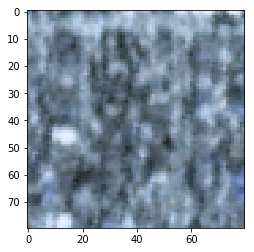

In [280]:
plt.imshow(windows[69])